In [107]:
import pandas as pd
import numpy as np
import pandas_datareader
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [156]:
start = datetime.datetime(1985,1,1)
end = datetime.datetime(2020,6,23)

In [161]:
sp500 = pandas_datareader.data.get_data_yahoo(['^GSPC'], start, end)['Adj Close']

In [162]:
sp500

Symbols,^GSPC
Date,
1985-01-02,165.369995
1985-01-03,164.570007
1985-01-04,163.679993
1985-01-07,164.240005
1985-01-08,163.990005
...,...
2020-06-17,3113.489990
2020-06-18,3115.340088
2020-06-19,3097.739990


In [128]:
plt.style.use('dark_background')

In [187]:
def getWeights(d,lags):
    '''return the weights from the series expansion of the differencing operator
    for real orders d and up to lags coefficients '''
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w

def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(6,4))
    plt.legend(title='Order of differencing',loc=4)
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()

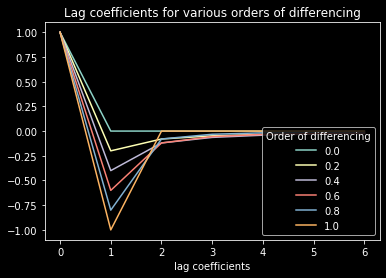

In [188]:
plotWeights([0,1],7,6)

In [130]:
def ts_differencing(series, order, lag_cutoff):
    '''return the time series resulting from (fractional) differencing 
    up to lag_cutoff coefficients '''
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:]

In [164]:
result = ts_differencing(sp500, 0.4, 7)

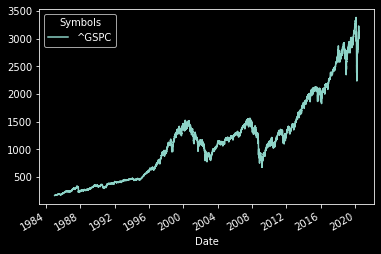

In [195]:
sp500[7:].plot()

In [190]:
result

Symbols,^GSPC
Date,
1985-01-11,54.755064
1985-01-14,57.077357
1985-01-15,56.130167
1985-01-16,55.943662
1985-01-17,55.024817
...,...
2020-06-17,1006.873792
2020-06-18,1009.020306
2020-06-19,990.400505


In [191]:
sp500[7:].corrwith(result)[0]

0.9988614945185299

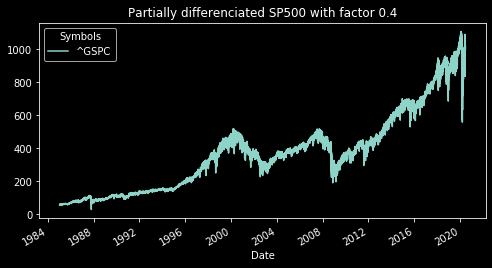

In [196]:
result.plot(figsize=(8,4))
plt.title('Partially differenciated SP500 with factor 0.4');

In [182]:
def plotMemoryVsCorr(result, seriesName):
    fig, ax = plt.subplots(figsize=(8,5))
    ax2 = ax.twinx()  
    ax.plot(result.order,result['adf'],c='g')
    ax.plot(result.order, result['5%'])
    ax2.plot(result.order,result['corr'],c='r')
    ax.set_xlabel('order of differencing', fontsize=12)
    ax.set_ylabel('adf', fontsize=15, c='g');
    ax2.set_ylabel('corr', fontsize=15, c='r');
    plt.title('ADF test statistics and correlation for {}'.format(seriesName.columns[0]), fontsize=15)
    plt.show()

In [139]:
from statsmodels.tsa.stattools import adfuller

In [140]:
def MemoryVsCorr(series, dRange, numberPlots, lag_cutoff, seriesName):
    '''return a data frame and plot comparing adf statistics and linear correlation
    for numberPlots orders of differencing in the interval dRange up to a lag_cutoff coefficients'''
    
    interval=np.linspace(dRange[0], dRange[1],numberPlots)
    result=pd.DataFrame(np.zeros((len(interval),4)))
    result.columns = ['order','adf','corr', '5%']
    result['order'] = interval
    for counter, order in enumerate(interval):
        seq_traf=ts_differencing(series,order,lag_cutoff)
        res=adfuller(seq_traf, maxlag=1, regression='c') #autolag='AIC'
        result.loc[counter,'adf'] = res[0]
        result.loc[counter,'5%'] = res[4]['5%']
        result.loc[counter,'corr'] = series[lag_cutoff:].corrwith(seq_traf)[0]
    plotMemoryVsCorr(result, seriesName)    
    return result

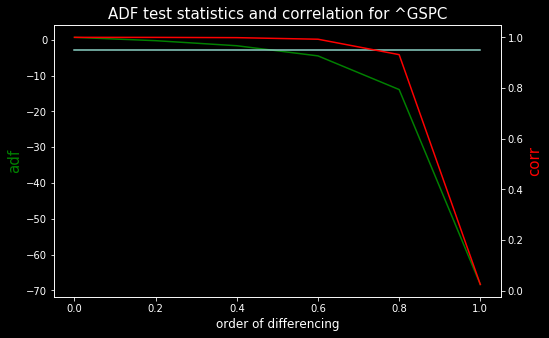

,order,adf,corr,5%
0,0.0,0.666944,1.000000,-2.861864
1,0.2,-0.260945,0.999866,-2.861864
2,0.4,-1.675039,0.998861,-2.861864
3,0.6,-4.511936,0.992627,-2.861864
4,0.8,-13.916804,0.931787,-2.861864
5,1.0,-68.359691,0.024773,-2.861864


In [183]:
MemoryVsCorr(sp500, [0,1], 6, 7, sp500)

In [40]:
 weights=getWeights(0.4, 7)

In [52]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])

In [57]:
z.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [19]:
w = [1]
d = 0.4
lags = 7
for k in range(1,lags):
    w.append(-w[-1]*((d-k+1))/k)
w=np.array(w).reshape(-1,1)

In [26]:
w

array([[ 1.       ],
       [-0.4      ],
       [-0.12     ],
       [-0.064    ],
       [-0.0416   ],
       [-0.029952 ],
       [-0.0229632]])

In [83]:
w[2]

array([-0.12])

In [22]:
weights = pd.DataFrame(np.zeros((lags, 6)))

In [24]:
interval = np.linspace(0,1,6)
for i, diff_order in enumerate(interval):
    weights[i]=getWeights(diff_order,lags)

In [28]:
weights.columns = [round(x,2) for x in interval]

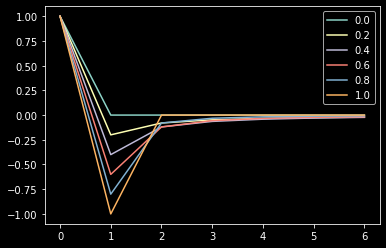

In [30]:
weights.plot()

In [44]:
spy.columns[0]

'SPY'